In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [58]:
df = pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [61]:
print(df.shape)
df_cleaned = df.dropna(subset=['Address'])
print(df_cleaned.shape)
filter = df['Area'].str.contains(',')
df_cleaned = df_cleaned[~filter]
print(df_cleaned.shape)

(3479, 8)
(3456, 8)
(3450, 8)


C:\Users\Mosi\AppData\Local\Temp\ipykernel_13072\2294558069.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~filter]


In [63]:
cdf = df_cleaned[['Area','Room','Parking','Elevator', 'Price']]
cdf.head()

,Area,Room,Parking,Elevator,Price
0,63,1,True,True,1.850000e+09
1,60,1,True,True,1.850000e+09
2,79,2,True,True,5.500000e+08
3,95,2,True,True,9.025000e+08
4,123,2,True,True,7.000000e+09


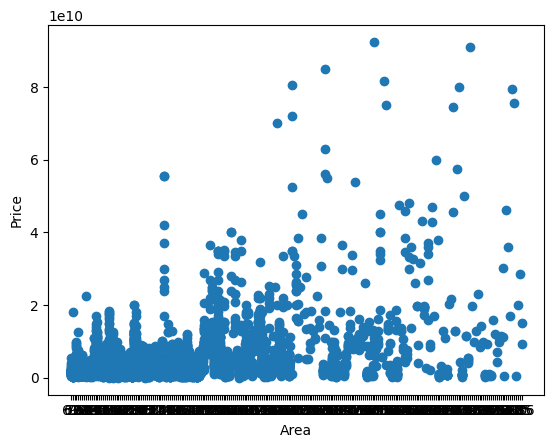

In [67]:
plt.scatter(cdf.Area, cdf.Price)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [68]:
msk = np.random.rand(len(df_cleaned)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train.shape)
print(test.shape)

(2753, 5)
(697, 5)


In [71]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)
print('Coef : ', regr.coef_)
print('intercept : ', regr.intercept_)

Coef :  [[7.06263729e+07 1.48299379e+09 1.02961289e+08 1.22143454e+09]]
intercept :  [-6.37347882e+09]


In [72]:
y_hat = regr.predict(test[['Area','Room','Parking','Elevator']])
x = np.asanyarray(test[['Area','Room','Parking','Elevator']])
y = np.asanyarray(test[['Price']])
print('score : %.2f' % regr.score(x,y))

score : 0.66


D:\programming\python3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
